In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os 

In [39]:
os.makedirs("CLEAN_DATA", exist_ok=True)

def upload_data(path:str) -> pd.DataFrame: 
    return pd.read_csv(path,on_bad_lines="skip")

def export_csv(name:str): 
    def my_decorator(func):
        def wrapper(*args,**kwargs): 
            df = func(*args,**kwargs)
            print("func:"+func.__name__+" executed")
            df.to_csv("./CLEAN_DATA/"+name)
            print("file:"+name+" exported")

            return df
        return wrapper
    return my_decorator

def number_na(path:str,date_name:str,frequence = "MS") ->pd.DataFrame:
    df = upload_data(path)
    df[date_name] = pd.to_datetime(df[date_name])
    df_numeric = df.select_dtypes(include='number')
    df_numeric = df_numeric.groupby(df[date_name]).mean()
    df_numeric.index = pd.to_datetime(df_numeric.index)
    date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq=frequence)
    df_numeric = df_numeric.reindex(date_range)
    na_count = df_numeric.isna().sum()/len(df_numeric)

    return na_count
    



### 1. VIX

In [40]:
number_na("./RAW_DATA/VIXCLS.csv","observation_date","D")

VIXCLS    0.308515
dtype: float64

In [28]:

@export_csv("vix.csv") 
def clean_vix(path:str) -> pd.DataFrame: 
    df = upload_data(path)
    date_range = pd.date_range(start = df["observation_date"].min(),end = df["observation_date"].max())
    df = df.groupby("observation_date").mean()
    df = df.reindex(date_range)
    df.index.name = "observation_date"
    df = df.ffill()
    
    return df 
   



In [20]:
df = clean_vix("./RAW_DATA/VIXCLS.csv")
df

func:clean_vix executed
file:vix.csv exported


,VIXCLS
observation_date,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-06,20.11
...,...
2026-01-24,16.09
2026-01-25,16.09
2026-01-26,16.15


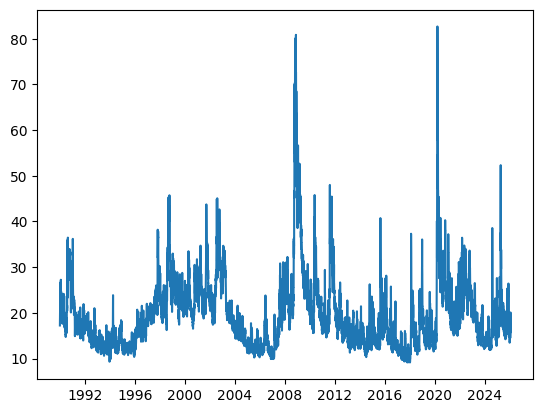

In [17]:

plt.Figure(figsize=(15,8))
plt.plot(df.index,df["VIXCLS"])
plt.show()


### 2. BigMac

In [41]:
number_na("./RAW_DATA/BigmacPrice.csv","date","D")

local_price     0.995447
dollar_ex       0.995447
dollar_price    0.995447
dtype: float64

In [ ]:
@export_csv("bigMacIndex.csv")
def clean_bigmac(path:str)->pd.DataFrame:
    df = upload_data(path)
    df = df.drop(labels=["currency_code","name","local_price","dollar_ex"],axis= 1)
    df = df.groupby("date").mean()
    df = df.reset_index()
    df["date"] = pd.to_datetime(df["date"])
    full_dates = pd.date_range(start=df["date"].min(), end=df['date'].max(), freq='D') 
    df = df.set_index("date").reindex(full_dates)
    df.index.name = 'observation_date'
    
    df = df.ffill()
    return df

In [ ]:
df = clean_bigmac("./RAW_DATA/BigmacPrice.csv")
df

func:clean_bigmac executed
file:bigMacIndex.csv exported


,dollar_price
observation_date,
2000-04-01,2.323929
2000-04-02,2.323929
2000-04-03,2.323929
2000-04-04,2.323929
2000-04-05,2.323929
...,...
2022-06-27,3.915479
2022-06-28,3.915479
2022-06-29,3.915479


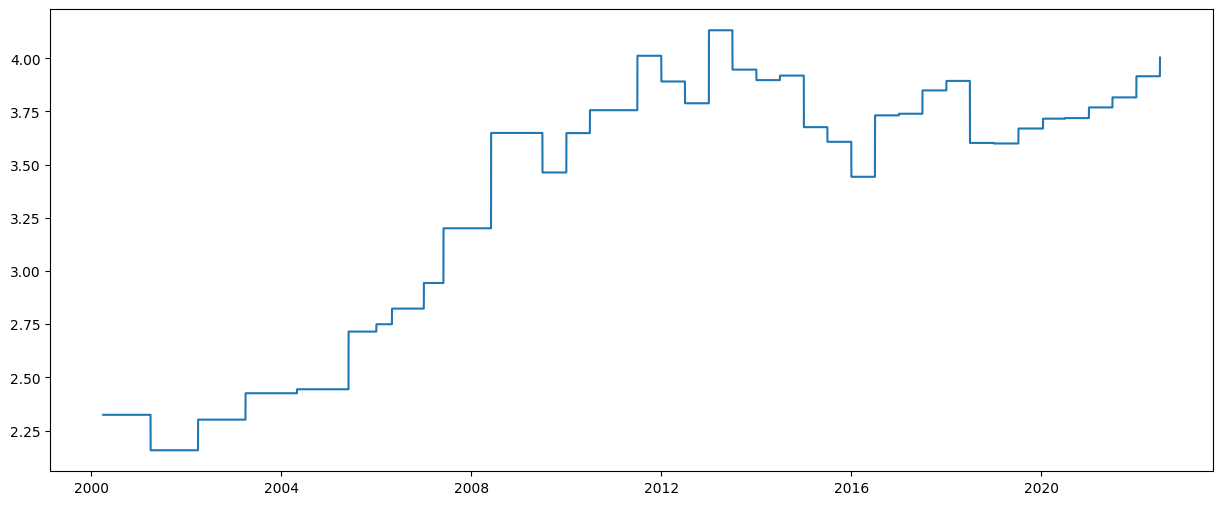

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df.index,df["dollar_price"])
plt.show()

### 3. Bitcoin 


In [42]:
number_na("./RAW_DATA/BTC-USD (2014-2024).csv","Date","D")

Open         0.000293
High         0.000293
Low          0.000293
Close        0.000293
Adj Close    0.000293
Volume       0.000293
dtype: float64

In [ ]:
@export_csv("bitcoin.csv")
def clean_bitcoin(path:str): 
    df = pd.read_csv(path)
    df["Date"] = pd.to_datetime(df["Date"])
    date_range = pd.date_range(start=df["Date"].min(),end=df["Date"].max(),freq="D")
    df = df.groupby("Date").mean()
    df = df.reindex(date_range)
    df.index.name = "observation_date"

    for columns in df.columns: 
      df[columns] = df[columns].ffill()
            
    return df


In [ ]:

df = clean_bitcoin("./RAW_DATA/BTC-USD (2014-2024).csv")
df

func:clean_bitcoin executed
file:bitcoin.csv exported


,Open,High,Low,Close,Adj Close,Volume
observation_date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
...,...,...,...,...,...,...
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10


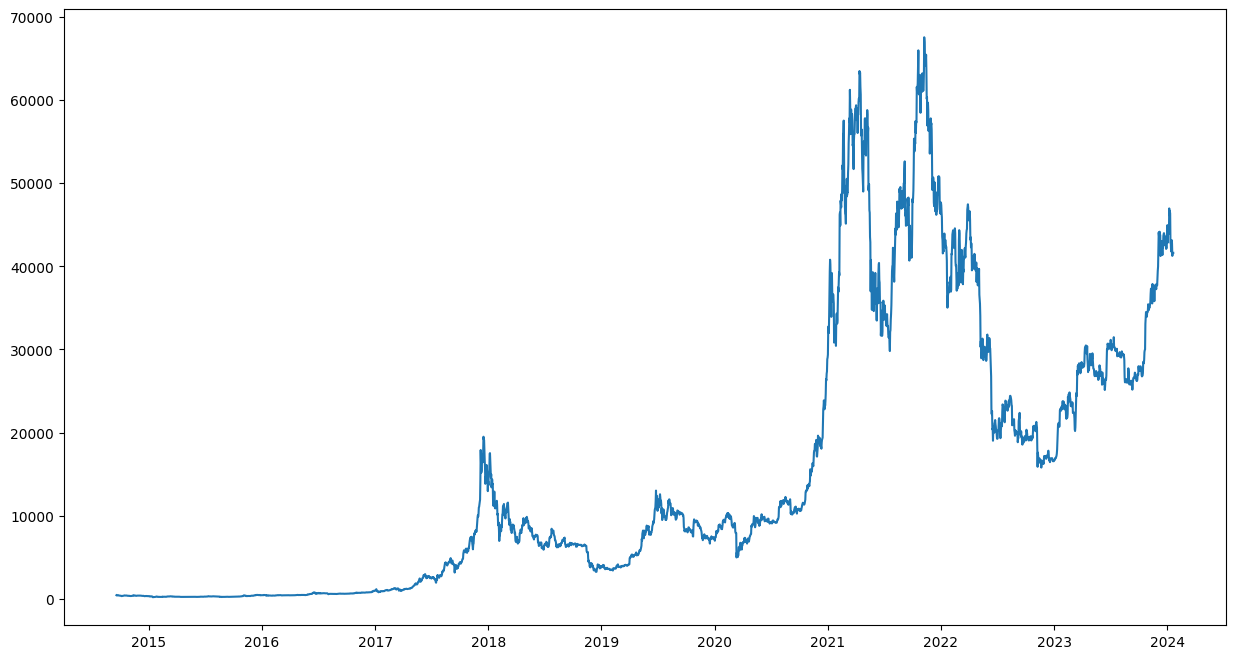

In [ ]:

plt.figure(figsize=(15,8))
plt.plot(df.index,df["Close"])
plt.show()

### 4. Observation Date

In [ ]:
df = pd.read_csv("./RAW_DATA/data.csv")
date =  pd.to_datetime(df["Date"])
test = pd.date_range(start= date.min(), end = date.max(), freq= "MS")
df = pd.DataFrame(test, columns=["observation_date"]).to_csv("observation_date.csv")

### 5. S&P 500

In [43]:
number_na("./RAW_DATA/data.csv","Date")

SP500                   0.082924
Dividend                0.082924
Earnings                0.082924
Consumer Price Index    0.082924
Long Interest Rate      0.082924
Real Price              0.082924
Real Dividend           0.082924
Real Earnings           0.082924
PE10                    0.082924
dtype: float64

In [ ]:
@export_csv("StandarAndPoor.csv")
def clean_sp(path:str) -> pd.DataFrame: 
    df = upload_data(path)
    df["Date"] = pd.to_datetime(df["Date"])

    
   
    df = df.groupby("Date").mean()

    for columns in df.columns: 
        df[columns] = df[columns].replace(0,np.nan)

    df = df.reset_index()

    date_range = pd.date_range(start= df["Date"].min(), end = df["Date"].max(), freq= "MS")
    df = df.set_index("Date").reindex(date_range) 
    df.index.name = "observation_date"  

    df = df.ffill()

    df = df.drop(columns=["PE10","Consumer Price Index"])
    df = df.rename(columns= {"SP500":"sp500","Dividend":"dividend",
                             "Earnings": "earnings","Long Interest Rate":"longInterestRate",
                             "Real Price":"realPrice","Real Dividend":"realDividend",
                             "Real Earnings":"realEarnings"})

    return df


In [ ]:
df = clean_sp("./RAW_DATA/data.csv")
df

func:clean_sp executed
file:StandarAndPoor.csv exported


,sp500,dividend,earnings,longInterestRate,realPrice,realDividend,realEarnings
observation_date,,,,,,,
1871-01-01,4.515000,0.26,0.40,5.335,111.325,6.41,9.86
1871-02-01,4.500000,0.26,0.40,5.320,107.250,6.20,9.53
1871-03-01,4.610000,0.26,0.40,5.330,108.270,6.11,9.39
1871-04-01,4.740000,0.26,0.40,5.330,115.540,6.34,9.75
1871-05-01,4.860000,0.26,0.40,5.330,121.220,6.48,9.98
...,...,...,...,...,...,...,...
2023-05-01,4146.173182,68.54,179.17,3.570,4173.450,68.99,180.35
2023-06-01,4345.372857,68.71,181.17,3.750,4359.880,68.94,181.77
2023-07-01,4508.075500,68.71,181.17,3.900,4514.510,68.94,181.77


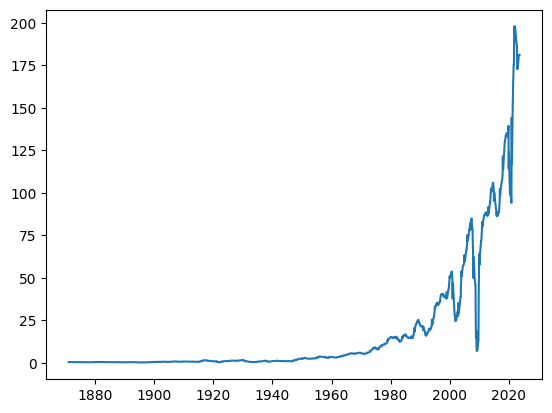

In [ ]:

plt.Figure(figsize=(15,8))
plt.plot(df.index,df["earnings"])
plt.show()


### 6. Inflation

In [47]:
number_na("./RAW_DATA/US CPI.csv","Yearmon")

CPI    0.91596
dtype: float64

In [ ]:
@export_csv("inflation.csv")
def clean_inflation(path:str) -> pd.DataFrame: 
    df = upload_data(path)
    df = df.rename(mapper= {"Yearmon":"observation_date"},axis=1)

    df = df.groupby("observation_date").mean()
    df = df.reset_index()
    df["observation_date"] = pd.to_datetime(df["observation_date"])

    date_range = pd.date_range(start= df["observation_date"].min(),end= df["observation_date"].max(),freq= "MS")
    df = df.set_index("observation_date").reindex(date_range)
    df.index.name = "observation_date"

    df = df.ffill()

    return df



In [ ]:

df = clean_inflation("./RAW_DATA/US CPI.csv")

func:clean_inflation executed
file:inflation.csv exported


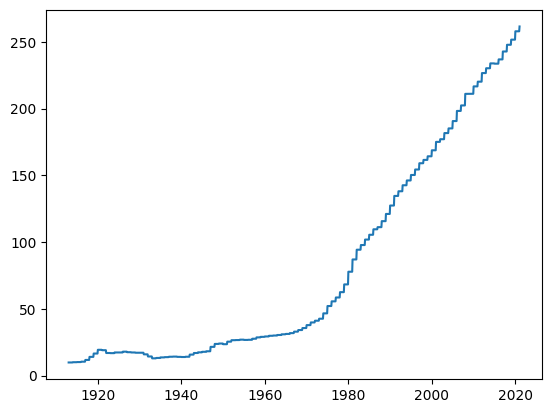

In [ ]:

plt.Figure(figsize=(15,8))
plt.plot(df.index,df["CPI"])
plt.show()


### 7. Financial Tweet 

In [ ]:

@export_csv("tweets.csv")
def clean_tweet(path:str) -> pd.DataFrame: 
    df = upload_data(path)
    
    df["timestamp"] = pd.to_datetime(df["timestamp"],format="mixed",utc=True,errors="coerce")
    df["timestamp"] = df["timestamp"].dt.normalize()
    df["timestamp"] = df["timestamp"].map(lambda x: x.replace(day=1))
    df["timestamp"] = df["timestamp"].dt.date
    df = df.drop_duplicates()
    df = df.dropna()
    df = df.drop(labels=["symbols","company_names","url","id"],axis=1)
    df = df.rename(columns={"timestamp":"observation_date","text":"tweet_text"})
    df = df[df["tweet_text"].str.len() <= 21844]
    df = df.set_index("observation_date")


    return df


clean_tweet("./RAW_DATA/stockerbot-export.csv")

func:clean_tweet executed
file:tweets.csv exported


,tweet_text,source,verified
observation_date,,,
2018-07-01,VIDEO: “I was in my office. I was minding my o...,GoldmanSachs,True
2018-07-01,The price of lumber $LB_F is down 22% since hi...,StockTwits,True
2018-07-01,Who says the American Dream is dead? https://t...,TheStreet,True
2018-07-01,Barry Silbert is extremely optimistic on bitco...,MarketWatch,True
2018-07-01,How satellites avoid attacks and space junk wh...,Forbes,True
...,...,...,...
2018-07-01,Exxon Once a ‘Perfect Machine’ Is Running Dry ...,danhyder,False
2018-07-01,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,keizai_toushi17,False
2018-07-01,RT @invest_in_hd: 'Nuff said! $TEL #telcoin #...,iad81,False


### 8. Financial Tweet Behavior

In [ ]:

@export_csv("financial_behavior.csv")
def clean_financial_tb(path:str) -> pd.DataFrame: 
    df = upload_data(path)
    df = df.dropna()
    df["tweet_content"] = df["tweet_content"].drop_duplicates()
    df = df.drop(columns=["sentiment_score","likes","retweets","replies","topic_tags"])
    df.index.name = "idTB"

    return df

clean_financial_tb("./RAW_DATA/financial_behavior_dataset.csv")

func:clean_financial_tb executed
file:financial_behavior.csv exported


,tweet_content,emotion,financial_behavior
idTB,,,
0,Hidden fees on loans are just unethical! #Fina...,Disgust,Good behavior
1,Predatory loans are a trap—know the risks befo...,Disgust,Risky behavior
2,Did you know investing $100 monthly can grow t...,Surprise,Moderate behavior
3,"Surprisingly, budgeting apps can save up to 20...",Surprise,Risky behavior
4,Imagine achieving financial independence by 40...,Anticipation,Moderate behavior
...,...,...,...
495,NaN,Disgust,Good behavior
496,NaN,Fear,Good behavior
497,NaN,Positive,Moderate behavior
